# Task (Answer sheet)

- Visualize the bottom 30 features with the largest p-values in 2-D space through PCA.
    - Tip: Copy & paste above codes and modify just ONE VALIABLE (number).
    - Don't need to import packages again.

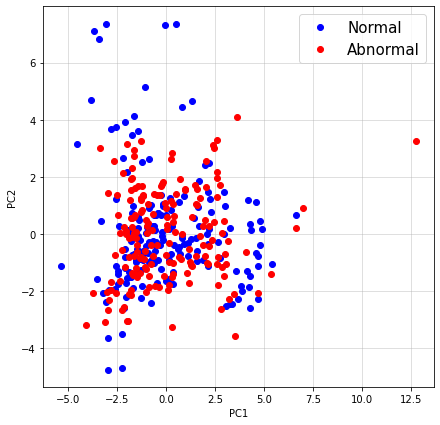

In [ ]:
# Select Target Features for PCA
StartRank = 240
Num       = 30

SelectedFeatues = np.zeros((Num, FeatureData.shape[1]))

s = 0
for i in range(StartRank, StartRank+Num):
    index                 = int(P_value_Rank.iloc[i-1,0])
    SelectedFeatues[s,:]  = FeatureData.iloc[index,:].values
    s += 1

FeatureSelected = pd.DataFrame(SelectedFeatues)
FeatureSelected = FeatureSelected.T


# Data Standardization (No Normalization)
FeatureSelected_std = StandardScaler().fit_transform(FeatureSelected)
FeatureSelected_std = pd.DataFrame(FeatureSelected_std)


# PCA Implementation
dim = 2  # Dimension to reduce
pca = PCA(n_components = dim)
PC  = pca.fit_transform(FeatureSelected_std)


# Visualization of PCA Result
NoOfData = int(FeatureData.shape[1]/2)

plt.figure(figsize = (7,7))
plt.plot(PC[:NoOfData,0], PC[:NoOfData,1], color='b', linestyle='', marker='o', label='Normal')
plt.plot(PC[NoOfData:,0], PC[NoOfData:,1], color='r', linestyle='', marker='o', label='Abnormal')
plt.legend(fontsize=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.5)
plt.show()
